<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<br><h2>Regression Modeling Case Study</h2>
<h4>DAT-5390 | Computational Data Analytics with Python</h4>
Ester Van de Put <br>
Hult International Business School<br><br><br>

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<br>

<h3>Introduction</h3><br>
<hr style="height:.7x;border:none;color:#333;background-color:#333;" /><br>
This regression modeling case study aims to develop a machine learning model for the Cook County Planning and Development Department to forecast daily bike rental demand in the Chicago Metropolitan area. The bike-sharing industry has seen rapid growth in recent years, reaching an estimated global value of $2.8 billion in 2023, driven by convenience, sustainability, and health.

The goal is to predict bike rental demand and identify the key factors influencing it, enabling my client, a leader in the bike-sharing market, to make better data-driven decisions and thus improve their business and service delivery strategies to better align with the growing needs and trends of the bike-rental market.

By delving into the dataset through exploratory data analysis, this study seeks to understand the relationships between various features that might impact rental patterns, such as humidity, wind speed, solar radiation, and others. 

The ultimate goal of this analysis is, therefore, to create a robust predictive model that captures the complex dynamics of the bike-sharing industry - considering features such as time of day, weather conditions, and holidays - to help our client make better decisions and adapt to market trends, therefore enhancing their competitiveness in the industry. 

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h2>Part I: Imports and Data Check</h2>

In [7]:
## importing libraries ##
import numpy as np # mathematical essentials
import pandas  as pd  # data science essentials
import sklearn.linear_model # linear models
import matplotlib.pyplot as plt # graphical output
import seaborn as sns # enhancing graphical output
import statsmodels.formula.api as smf # predictive modeling 
import sklearn.neighbors
import sklearn.tree

from sklearn.model_selection import train_test_split, RandomizedSearchCV # train/test split
from sklearn.metrics import r2_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler # standard scale
from datetime import datetime


# setting pandas print options 
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

<br>

In [5]:
## Importing data ##

# Reading modeling data into Python.
modeling_data = './datasets/train.xlsx'

# Calling this df_train.
df_train = pd.read_excel(io         = modeling_data,
                         sheet_name = 'data',
                         header     = 0,
                         index_col  = 'ID')



# Reading testing data into Python
testing_data = './datasets/test.xlsx'

# Calling this df_test.
df_test = pd.read_excel(io         = testing_data,
                        sheet_name = 'data',
                        header     = 0,
                        index_col  = 'ID')

<br>

In [6]:
# Concatenating datasets together for mv analysis and feature engineering.
df_train['set'] = 'Not Kaggle'
df_test ['set'] = 'Kaggle'

# Concatenating both datasets together for mv and feature engineering.
df_full = pd.concat(objs = [df_train, df_test],
                    axis = 0,
                    ignore_index = False)


# Checking data.
df_full.head(n = 5)

,DateHour,Temperature(F),Humidity(%),Wind speed (mph),Visibility(miles),DewPointTemperature(F),Rainfall(in),Snowfall(in),SolarRadiation(MJ/m2),Holiday,FunctioningDay,RENTALS,set
ID,,,,,,,,,,,,,
mb_1039,2023-10-14 05:59:54.810000,52,81,0.4,2.9,46.4,0.0,0.0,0.00,No,Yes,519.0,Not Kaggle
mb_1330,2023-10-26 08:59:53.355000,51,53,2.2,NaN,35.2,0.0,0.0,1.01,No,Yes,1251.0,Not Kaggle
mb_551,2023-09-23 21:59:57.250000,56,49,2.5,3.4,38.8,0.0,0.0,0.00,No,Yes,1685.0,Not Kaggle
mb_2103,2023-12-19 14:00:00,69,32,9.8,12.4,38.7,0.0,0.0,2.36,No,No,0.0,Not Kaggle
mb_1430,2023-10-30 12:59:52.855000,53,20,2.9,10.8,12.9,0.0,0.0,1.96,No,Yes,814.0,Not Kaggle


<hr style="height:.7x;border:none;color:#333;background-color:#333;" /><br>

<h2> PART II : Data Preparation & Descriptive Analysis </h2>
<br><hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
<h3> Descriptive Analysis</h3>

This section delves into the dataset, offering better insights into the training, testing, and overall data. We start by examining the dataset's size, the variety of data types it includes, and any missing values. 

A key part of our analysis involves looking at descriptive statistics for each feature, including means, standard deviations, minimums, and maximums, which will provide us with a better picture of how the data is distributed and the scale of each feature.

Through this process, if any aspect seems particularly intriguing, we will investigate further to uncover patterns that could be helpful to the creation of our model. 

<br>

In [8]:
# Displaying the first 5 rows of the DataFrame df_train to analyze the initial data
df_train.head(n=5)

,DateHour,Temperature(F),Humidity(%),Wind speed (mph),Visibility(miles),DewPointTemperature(F),Rainfall(in),Snowfall(in),SolarRadiation(MJ/m2),Holiday,FunctioningDay,RENTALS,set
ID,,,,,,,,,,,,,
mb_1039,2023-10-14 05:59:54.810000,52,81,0.4,2.9,46.4,0.0,0.0,0.00,No,Yes,519,Not Kaggle
mb_1330,2023-10-26 08:59:53.355000,51,53,2.2,NaN,35.2,0.0,0.0,1.01,No,Yes,1251,Not Kaggle
mb_551,2023-09-23 21:59:57.250000,56,49,2.5,3.4,38.8,0.0,0.0,0.00,No,Yes,1685,Not Kaggle
mb_2103,2023-12-19 14:00:00,69,32,9.8,12.4,38.7,0.0,0.0,2.36,No,No,0,Not Kaggle
mb_1430,2023-10-30 12:59:52.855000,53,20,2.9,10.8,12.9,0.0,0.0,1.96,No,Yes,814,Not Kaggle


In [9]:
# Retrieve and display the features names of df_full to understand the Dataframe structure
df_full.columns

Index(['DateHour', 'Temperature(F)', 'Humidity(%)', 'Wind speed (mph)', 'Visibility(miles)', 'DewPointTemperature(F)', 'Rainfall(in)', 'Snowfall(in)', 'SolarRadiation(MJ/m2)', 'Holiday', 'FunctioningDay', 'RENTALS', 'set'], dtype='object')

<br>

In [10]:
# Generating descriptive statistics of the Dataframe df_full
# including count, mean, standard deviaition, minimum and maximum values. 
df_full.describe()

,Temperature(F),Humidity(%),Wind speed (mph),Visibility(miles),DewPointTemperature(F),Rainfall(in),Snowfall(in),SolarRadiation(MJ/m2),RENTALS
count,2184.000000,2184.000000,2184.000000,2108.000000,2117.000000,2184.000000,2184.000000,2078.000000,1638.000000
mean,57.389652,59.228480,3.344780,9.646964,42.036089,0.004858,0.002015,0.547161,828.153846
std,12.861669,18.686445,2.071144,3.492413,13.997667,0.037354,0.018550,0.810564,657.599846
min,26.000000,13.000000,0.000000,0.000000,-2.200000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,44.000000,1.800000,7.400000,33.400000,0.000000,0.000000,0.000000,241.500000
50%,57.000000,59.000000,2.900000,11.700000,41.900000,0.000000,0.000000,0.000000,761.500000
75%,68.000000,74.000000,4.500000,12.400000,51.600000,0.000000,0.000000,0.980000,1203.750000
max,91.000000,97.000000,12.800000,12.400000,75.000000,0.710000,0.300000,3.180000,3303.000000


In [11]:
# Displaying detailed information about the DataFrame df_full,
# Including the variable dtype, the columns name, non-null counts

df_full.info(verbose=True) #  Setting 'Verbose' to True to ensure all column information are printed. 

<class 'pandas.core.frame.DataFrame'>
Index: 2184 entries, mb_1039 to mb_1225
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   DateHour                2184 non-null   object 
 1   Temperature(F)          2184 non-null   int64  
 2   Humidity(%)             2184 non-null   int64  
 3   Wind speed (mph)        2184 non-null   float64
 4   Visibility(miles)       2108 non-null   float64
 5   DewPointTemperature(F)  2117 non-null   float64
 6   Rainfall(in)            2184 non-null   float64
 7   Snowfall(in)            2184 non-null   float64
 8   SolarRadiation(MJ/m2)   2078 non-null   float64
 9   Holiday                 2184 non-null   object 
 10  FunctioningDay          2184 non-null   object 
 11  RENTALS                 1638 non-null   float64
 12  set                     2184 non-null   object 
dtypes: float64(7), int64(2), object(4)
memory usage: 238.9+ KB


In [12]:
# Retrieve and display the column names of the df_train Dataframe to better understand the dataset's structure.
df_train.columns

Index(['DateHour', 'Temperature(F)', 'Humidity(%)', 'Wind speed (mph)', 'Visibility(miles)', 'DewPointTemperature(F)', 'Rainfall(in)', 'Snowfall(in)', 'SolarRadiation(MJ/m2)', 'Holiday', 'FunctioningDay', 'RENTALS', 'set'], dtype='object')

In [13]:
# Generating descriptive statistics for numeric columns in df_full, rounded to 2 decimal places. 
# Including count, mean, std deviation, min, max, and quartiles.
df_full.describe(include = 'number').round(decimals = 2)

,Temperature(F),Humidity(%),Wind speed (mph),Visibility(miles),DewPointTemperature(F),Rainfall(in),Snowfall(in),SolarRadiation(MJ/m2),RENTALS
count,2184.00,2184.00,2184.00,2108.00,2117.00,2184.00,2184.00,2078.00,1638.00
mean,57.39,59.23,3.34,9.65,42.04,0.00,0.00,0.55,828.15
std,12.86,18.69,2.07,3.49,14.00,0.04,0.02,0.81,657.60
min,26.00,13.00,0.00,0.00,-2.20,0.00,0.00,0.00,0.00
25%,48.00,44.00,1.80,7.40,33.40,0.00,0.00,0.00,241.50
50%,57.00,59.00,2.90,11.70,41.90,0.00,0.00,0.00,761.50
75%,68.00,74.00,4.50,12.40,51.60,0.00,0.00,0.98,1203.75
max,91.00,97.00,12.80,12.40,75.00,0.71,0.30,3.18,3303.00


In [14]:
# Extracting numerical statistics for columns 1 onwards in df_full and rounding to 2 decimals.
# Including count, mean, std deviation, min, max, and quartiles. 
# Storing results in df_full_stats
df_full_stats = df_full.iloc[ :, 1: ].describe(include = 'number').round(decimals = 2)

df_full_stats.head(n=5)

,Temperature(F),Humidity(%),Wind speed (mph),Visibility(miles),DewPointTemperature(F),Rainfall(in),Snowfall(in),SolarRadiation(MJ/m2),RENTALS
count,2184.00,2184.00,2184.00,2108.00,2117.00,2184.00,2184.00,2078.00,1638.00
mean,57.39,59.23,3.34,9.65,42.04,0.00,0.00,0.55,828.15
std,12.86,18.69,2.07,3.49,14.00,0.04,0.02,0.81,657.60
min,26.00,13.00,0.00,0.00,-2.20,0.00,0.00,0.00,0.00
25%,48.00,44.00,1.80,7.40,33.40,0.00,0.00,0.00,241.50


The descriptive summary statistics provides me with some great insights about the full dataset, which will help me in my analysis process.

The average temperature is about 57.39°F, with a standard deviation of 12.86°F, indicating that the temperature changes a lot. Wind speed is usually around 3.34 mph, and there's almost no change in how much it rains or snows, which makes me think that it did not rain or snowed much during the time those observations were taken. 

The quartile values show that 25% of the visibility, which could be a key component when wanting to rent a bike, is 7.40 miles, and 75% are under 12.40 miles. 

The minimum and maximum for each variable indicates the range they cover. For instance, temperatures range from a low of 26.00°F to a high of 91.00°F, showing various weather conditions. 

Finally, the 'RENTALS' number - which is the variable we are the most interested in - shows an average of 828.15, meaning that usually 828 bikes are renting during that period. 

<br><hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
<h3>Base Modeling</h3>

This step set is key in the analysis as it allows us to identify 'RENTALS' as the target variable, which will help direct the focus of the predictive model towards forecasting bike rental based on the different dataset's features. 

In [15]:
#!##############################!#
#!# set your response variable #!#
#!##############################!#
y_variable = 'RENTALS' # should be a str

In [16]:
## Base Modeling ##

# Initial exploration to determine the dataset size.
# Printing the number of obersations (row) and feature (column) in df_full.

# Formatting and printing the dimensions of the full dataset.

print(f"""
Size of Original Dataset
------------------------
Observations (rows): {df_full.shape[0]}
Features (columns) : {df_full.shape[1]}
""")


Size of Original Dataset
------------------------
Observations (rows): 2184
Features (columns) : 13



In [17]:
# Again, initial exploration to determine the training dataset size.

# Formatting and printing the dimensions of the train dataset.

print(f"""
Size of Original Dataset
------------------------
Observations (rows): {df_train.shape[0]}
Features (columns) : {df_train.shape[1]}
""")


Size of Original Dataset
------------------------
Observations (rows): 1638
Features (columns) : 13



<br><hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
<h3> Converting features </h3>

Based on my insights, I converted some features to simplify the dataset to ease my analysis. First,  I focused on zero values in "Snowfall(in)" and "Rainfall(in)" to assess precipitation occurrences. Then, I converted "Holiday" and "Functioning Day" to binary for simplicity and split "DateHour" into distinct dates and times to improve my model's ability to interpret temporal data.

In [18]:
# Rainfall and Snowfall have a bunch of observation at 0.
# Meaning it didn't rain and/or snow during those days.

# How many days did it rain during this period
print((df_train["Rainfall(in)"]>0).value_counts())

#How Many did it snow during this period
print((df_train["Snowfall(in)"]>0).value_counts())

Rainfall(in)
False    1572
True       66
Name: count, dtype: int64
Snowfall(in)
False    1618
True       20
Name: count, dtype: int64


In [19]:
# Converting Holiday' and 'FunctioningDay' columns from 'No', 'Yes' to 0, 1, respectively to get a binary encoding. 
# Displaying the first 5 rows to verify it worked

# Convert the Holiday variable
df_full['Holiday'] = df_full['Holiday'].map({'No': 0, 'Yes': 1})

# Converts to FunctioningDay variable 
df_full['FunctioningDay'] = df_full['FunctioningDay'].map({'No': 0, 'Yes': 1})

# Displaying the first 5 rows.
df_full[['Holiday', 'FunctioningDay']].head()

,Holiday,FunctioningDay
ID,,
mb_1039,0,1
mb_1330,0,1
mb_551,0,1
mb_2103,0,0
mb_1430,0,1


In [20]:
# Need to separate Date and Hour and turn them into their own feature. 
# Converting 'DateHour' to 'datetime' format. 

# Changing data type to datetime.
df_full['DateHour'] = pd.to_datetime(df_full['DateHour'], format = 'mixed')

df_full["Date"]= pd.to_datetime(df_full['DateHour']).dt.date # Extracting date and assigning it to a new 'Date' column
df_full['Time']= pd.to_datetime(df_full['DateHour']).dt.time # Extracting time and assigning it to a new 'Time' column.
df_full['Hour']= pd.to_datetime(df_full['DateHour']).dt.hour # Extracting hour and assigning it to a new 'Hour' column.
df_full["Day"]= pd.to_datetime(df_full['DateHour']).dt.day # Extracting day of the month and assigning it to a new 'Day' colum
df_full["Month"]= pd.to_datetime(df_full['DateHour']).dt.month # Extracting month and assigning it to a new 'Month' colum



# Calculating week of the year and storing in 'Week'.
df_full['Week'] = df_full['DateHour'].dt.isocalendar().week 

# Extract weekday from 'date' column (monday = 0, sunday = 7) and storing in 'Weekday'.
df_full['Weekday'] = df_full['DateHour'].dt.dayofweek

# Drop 'DateHour' and 'Time' columns to simplify the dataset.
df_full.drop(labels  = ['DateHour', 'Time'],
             axis    = 1,
             inplace = True)

# Display first few rows of the modified DataFrame for verification.
df_full.head()

,Temperature(F),Humidity(%),Wind speed (mph),Visibility(miles),DewPointTemperature(F),Rainfall(in),Snowfall(in),SolarRadiation(MJ/m2),Holiday,FunctioningDay,RENTALS,set,Date,Hour,Day,Month,Week,Weekday
ID,,,,,,,,,,,,,,,,,,
mb_1039,52,81,0.4,2.9,46.4,0.0,0.0,0.00,0,1,519.0,Not Kaggle,2023-10-14,5,14,10,41,5
mb_1330,51,53,2.2,NaN,35.2,0.0,0.0,1.01,0,1,1251.0,Not Kaggle,2023-10-26,8,26,10,43,3
mb_551,56,49,2.5,3.4,38.8,0.0,0.0,0.00,0,1,1685.0,Not Kaggle,2023-09-23,21,23,9,38,5
mb_2103,69,32,9.8,12.4,38.7,0.0,0.0,2.36,0,0,0.0,Not Kaggle,2023-12-19,14,19,12,51,1
mb_1430,53,20,2.9,10.8,12.9,0.0,0.0,1.96,0,1,814.0,Not Kaggle,2023-10-30,12,30,10,44,0


<br><hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
<h3> Correlation matric for RENTALS </h3>

After checking my data and doing some basic modeling, I will look more closely at how RENTALS relate to all the number-based features to see if there are any patterns or valuable insights that can help me improve my model.

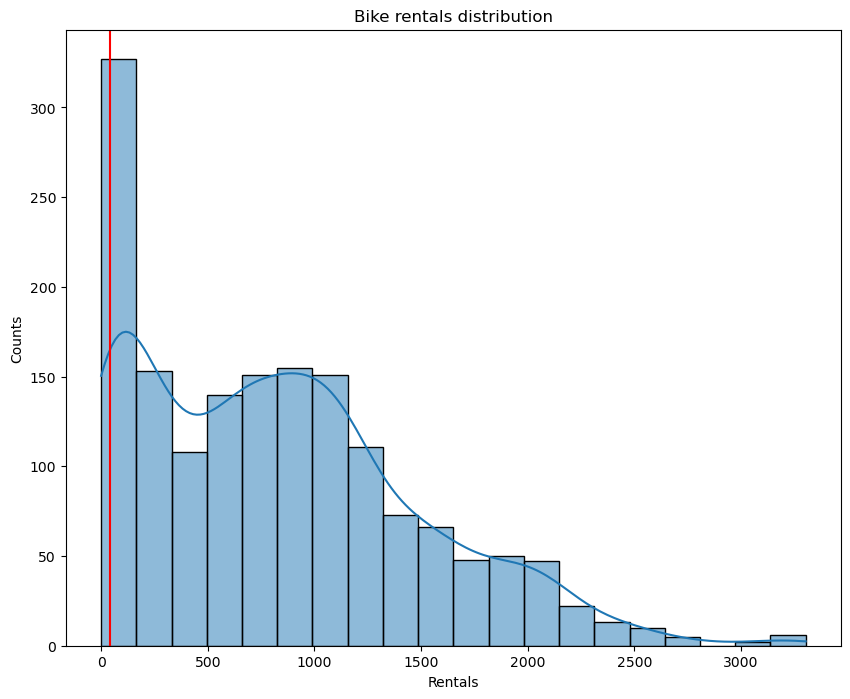

In [22]:
# Develop a histogram with HISTPLOT to visualize the distribution of the 'RENTALS' 

# Set the histogram figure size.
plt.figure(figsize = (10,8))


sns.histplot(data = df_full['RENTALS'],
             bins = 20,
             kde = True)# KDE added for smooth distribution curve.

# Adding title and axis labels to the graph 
plt.title (label = 'Bike rentals distribution')
plt.xlabel (xlabel = 'Rentals')
plt.ylabel (ylabel = 'Counts')

# Adding a vertical line at the 'median' to visualize it's position in the distribution. 
plt.axvline(df_full['DewPointTemperature(F)'].mean(), 
           color = 'red')

# Display the histogram to visualize the distribution. 
plt.show()

This histogram shows a high occurrence of days with fewer rentals, suggesting that the demand for bike rentals is low on most days.
Accordingly, the histogram is skewed towards the lower rental counts, suggesting that certain factors or conditions (such as wind speed, visibility, temperature, and humidity may lead to lower rental demands on most days. 

In [23]:
# Attempted to calculate correlation for all numerical features (excluding 'set' and 'Date')
#corr = df_full.corr(numeric_only = True, method = 'pearson')
##### it gave me too many column so I changed the code but still wanted to include it ####

# Calculating correlation matrix for a subset of features.
corr = df_full[['Temperature(F)', # selecting a subset of features for the correlation analysis. 
                'Humidity(%)', 
                'Wind speed (mph)', 
                'Visibility(miles)',
                'DewPointTemperature(F)', 
                'Rainfall(in)',
                'Snowfall(in)', 
                'SolarRadiation(MJ/m2)',
                'Holiday', 
                'FunctioningDay', 
                'RENTALS',
                'Hour',
                'Week',
                'Weekday']].corr(method = 'pearson')

# Filter and sort the correlation results to focus on 'RENTALS'.
corr.loc[:, 'RENTALS'].round(decimals = 3).sort_values()

Humidity(%)              -0.395
Rainfall(in)             -0.146
Snowfall(in)             -0.087
Week                     -0.037
Holiday                  -0.025
Visibility(miles)         0.004
DewPointTemperature(F)    0.031
Weekday                   0.097
Wind speed (mph)          0.186
SolarRadiation(MJ/m2)     0.208
Temperature(F)            0.323
Hour                      0.423
FunctioningDay            0.447
RENTALS                   1.000
Name: RENTALS, dtype: float64

In [24]:
# Used the statsmodels package for linear regression analysis.

# (1) Instantiate a model object with specific features to predict 'RENTALS'.
# Used 'ols' method to evaluate the relationship between 'RENTALS' and different features.
lm_best = smf.ols(formula="""RENTALS ~ FunctioningDay +
                                Q("Temperature(F)") +
                                 Q("Humidity(%)") +
                                 Hour +
                                 Q("Wind speed (mph)") +
                                 Q("Visibility(miles)") +
                                 Q("DewPointTemperature(F)") +
                                 Q("Rainfall(in)") +
                                 Q("Snowfall(in)") +
                                 Q("SolarRadiation(MJ/m2)")""",
                  data=df_full)

# (2) Fitting the model with the dataset.
# This will compute the best-fitting line for predicting 'RENTALS' from the features I selected.
results = lm_best.fit()

# (3) analyze the SUMMARY output of the model fit.
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                RENTALS   R-squared:                       0.546
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     174.1
Date:                Thu, 22 Feb 2024   Prob (F-statistic):          8.24e-240
Time:                        23:54:27   Log-Likelihood:                -10938.
No. Observations:                1456   AIC:                         2.190e+04
Df Residuals:                    1445   BIC:                         2.196e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

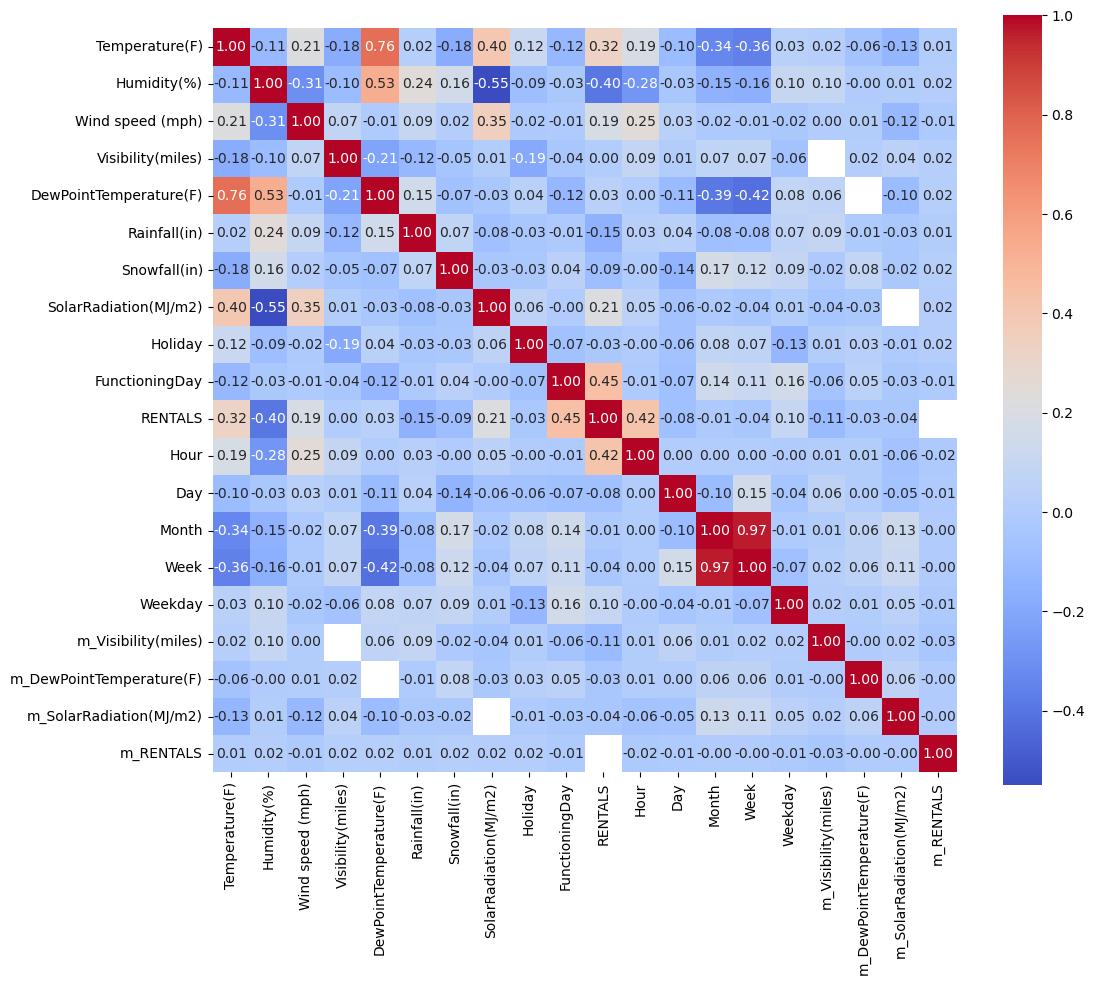

In [30]:
## Visualizing the correlation matrix ##

# Calculate the correlation matrix for numerical columns ONLY in df_full to analyze the inter-variables relationship.
corr = df_full.corr(numeric_only = True)

# Set up the matplotlib figure size. 
plt.figure(figsize=(12, 10))

# Creating a heatmap to visualize the correlation matrix.
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)

# Display the heatmap results.
plt.show()

I performed a regression analysis to better understand which factors impact the bike rental demand more. 
The OLS regression revealed a few interesting insights into how different features correlate with the rental frequency: 

(1) Functioning Days of operation and rentals (1033.44):
This positive coefficient for Functioning Days suggests that bike rentals surge when the bike-sharing service is active, which is not a surprise since the shop needs to be open for people to rent a bike unless they rent it over a certain period. 
This highlights service availability as a key 'driver' of rental volume.

(3) Hour and rentals (26.93): 
Meaning that each hour corresponds to an increase of approximately 26.93 rentals, which indicates that as the day progresses, the number of rentals consistently rises.

(4) Humidity and rentals (-16.95):
The negative coefficient of -16.95 for humidity suggests that bike rentals tend to decrease as humidity increases, likely due to the discomfort associated with more humid conditions.

(5) Rainfall and rentals (-1408.37):
A sharp drop in rentals by about 1408.37 during rainy conditions emphasizes that precipitation is a significant deterrent for bike rentals, again, not a surprise, I would not want to bike in rain/snow either. 

(6) Temperature, Wind speed, and Visibility:
With coefficients of 4.75 for temperature, 6.33 for wind speed, and 5.02 for Visibility, none of these features seem to significantly predict bike rentals, at least on their own. 

(7) Dew Point Temperature and rentals (14.41):
A higher dew point temperature, which can be associated with more comfortable weather, shows a positive relationship with rentals, increasing them by approximately 14.41.

(8) Solar Radiation and rentals (-95.52):
Solar Radiation, with a negative coefficient of -95.52, indicates that higher levels of sunlight could lead to a decrease in bike rentals, which could be due to the heat and brightness being less favorable for biking.


<br><h3>Missing Value Analysis and Imputation</h3>

Now that I've gained a clearer insight into my dataset and explored how my target variable, RENTALS, correlates with the numerical features in my dataset, my next step is to address the missing values. I'll start by identifying which features have missing values and then examine each further to determine the best strategy for imputing/ handling these gaps to keep the data consistent and representative. 

In [31]:
# Checking for missing values in df_full to identify columns that require imputation.
df_full.isnull().sum(axis=0)

Temperature(F)                0
Humidity(%)                   0
Wind speed (mph)              0
Visibility(miles)            76
DewPointTemperature(F)       67
Rainfall(in)                  0
Snowfall(in)                  0
SolarRadiation(MJ/m2)       106
Holiday                       0
FunctioningDay                0
RENTALS                     546
set                           0
Date                          0
Hour                          0
Day                           0
Month                         0
Week                          0
Weekday                       0
m_Visibility(miles)           0
m_DewPointTemperature(F)      0
m_SolarRadiation(MJ/m2)       0
m_RENTALS                     0
dtype: int64

In [32]:
# Looping to flag features with missing values in df_full. 
for col in df_full:

    #  Checking if the columns have missing values and creating a new flag column.
    # The new flag column will contain 1 for missing values and 0 for non-missing values.
    if df_full[col].isnull().astype(int).sum() > 0:
        df_full['m_'+col] = df_full[col].isnull().astype(int)

In [33]:
## following the class script, but I'm not sure this did anything for me ##

# Summing the missing values for the columns that have been flagged in the imputation process.
# Specifically, checking the number of missing values in 'Visibility(miles)', 'DewPointTemperature(F)', and 'SolarRadiation(MJ/m2)'
df_full[['Visibility(miles)', 'DewPointTemperature(F)', 'SolarRadiation(MJ/m2)']].sum(axis=0)

Visibility(miles)         20335.8
DewPointTemperature(F)    88990.4
SolarRadiation(MJ/m2)      1137.0
dtype: float64

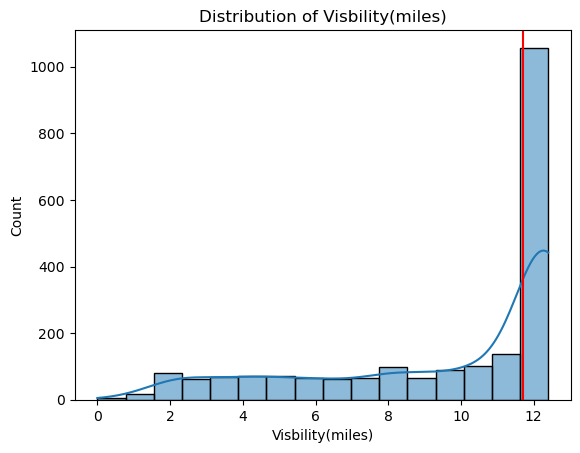

11.7


In [34]:
# Missing value imputation for Visibility(miles)

# Analyzing the distribution of 'Visibility(miles)' using a histogram to decide on which imputation strategy to use.
sns.histplot(x = 'Visibility(miles)',
            data = df_full,
            kde = True)

# Adding a vertical line at the 'median' to visualize it's position in the distribution. 
plt.axvline(df_full['Visibility(miles)'].median(), 
           color = 'red')

# Adding title and  axis labels to the graph 
plt.title (label = 'Distribution of Visbility(miles)')
plt.xlabel (xlabel = 'Visbility(miles)')
plt.ylabel (ylabel = 'Count')

# Displaying the histogram.
plt.show()

# Print the median value of Visibility(miles) to maybe use for missing values imputation. 
print(df_full["Visibility(miles)"].median())

In [35]:
# The histogram graph shows that median is representative of the data. 
# Therefore, imputing missing values in 'Visibility(miles)' with the median value.  
df_full["Visibility(miles)"].fillna(value = df_full["Visibility(miles)"].median(), inplace = True)

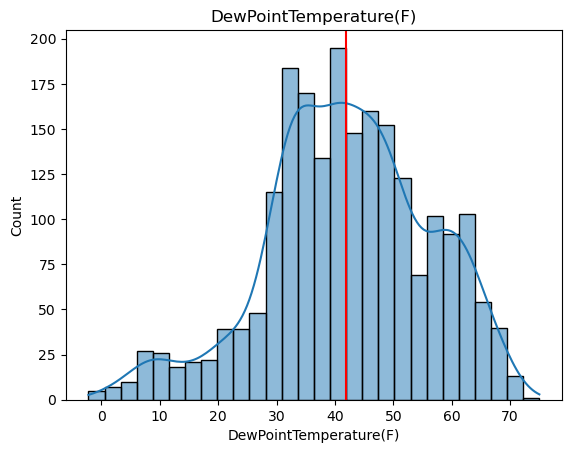

41.9


In [36]:
### Repeat process step by step for DewPointTemperature(F) ###

# Analyzing the distribution of 'DewPointTemperature(F)' using a histogram to decide on which imputation strategy to use.
sns.histplot(x = 'DewPointTemperature(F)',
            data = df_full,
            kde = True)

# Adding a vertical line at the 'median' to visualize it's position in the distribution. 
plt.axvline(df_full['DewPointTemperature(F)'].median(), 
           color = 'red')

# Adding title and axis labels to the graph. 
plt.title (label = 'DewPointTemperature(F)')
plt.xlabel (xlabel = 'DewPointTemperature(F)')
plt.ylabel (ylabel = 'Count')

# Displaying the histogram.
plt.show()

# Print the median value of 'DewPointTemperature(F)' to maybe use for imputation. 
print(df_full["DewPointTemperature(F)"].median())

In [37]:
# DewPointTemperature(F) seem to mostly fall around 40 degree
# Impute median to fill in the missing value to keep the data consistent without changing the overall pattern. 
df_full["DewPointTemperature(F)"].fillna(value = df_full["DewPointTemperature(F)"].median(), inplace = True)

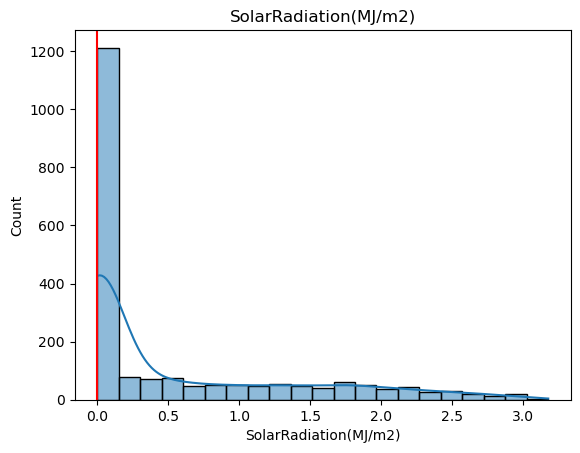

0.0


In [38]:
### Repeat process step by step for SolarRadiation(MJ/m2) ###

# Analyzing the distribution of 'SolarRadiation(MJ/m2)' using a histogram to decide on which imputation strategy to use.
sns.histplot(x = 'SolarRadiation(MJ/m2)',
            data = df_full,
            kde = True)

# Adding a vertical line at the 'median' to visualize it's position in the distribution. 
plt.axvline(df_full['SolarRadiation(MJ/m2)'].median(), 
           color = 'red')

# Adding title and axis labels to the graph. 
plt.title (label = 'SolarRadiation(MJ/m2)')
plt.xlabel (xlabel = 'SolarRadiation(MJ/m2)')
plt.ylabel (ylabel = 'Count')

# Displaying the histogram.
plt.show()

# Print the median value of 'SolarRadiation(MJ/m2)' to maybe use for imputation. 
print(df_full["SolarRadiation(MJ/m2)"].median())

In [39]:
# Impute median value for 'SolarRadiation(MJ/m2)'' to fill in the missing value in the data and keep the data consistent.
df_full["SolarRadiation(MJ/m2)"].fillna(value = df_full["SolarRadiation(MJ/m2)"].median(), inplace = True)

In [40]:
# Now, checking that ALL missing values (except for RENTALS) have been handled. 
df_full.isnull().sum(axis=0)

Temperature(F)                0
Humidity(%)                   0
Wind speed (mph)              0
Visibility(miles)             0
DewPointTemperature(F)        0
Rainfall(in)                  0
Snowfall(in)                  0
SolarRadiation(MJ/m2)         0
Holiday                       0
FunctioningDay                0
RENTALS                     546
set                           0
Date                          0
Hour                          0
Day                           0
Month                         0
Week                          0
Weekday                       0
m_Visibility(miles)           0
m_DewPointTemperature(F)      0
m_SolarRadiation(MJ/m2)       0
m_RENTALS                     0
dtype: int64

In [41]:
# Verifying if there are any remaining missing values in the entire dataframe df_full.
# There will be, since RENTALS missing values are still in there. 
df_full.isnull().any().any()

True

Below is another way 'quicker' to handle and impute missing value in the dataset by using the function SimpleImputer(). 

In [29]:
# Used the help() function to display the documentation on SimpleImputer and understand it's functionality. 
# help(SimpleImputer)

In [30]:
### Another way of handling missing values ### 

# Define an imputation strategy using the median for missing values
# Using SimpleImputer with a median strategy to handle missing data in specified columns.

# Median imputatiton
#median_imputer= SimpleImputer( strategy = 'median')

# Apply median imputation to the selected columns.
# This will replace missing values in these columns with their respective medians.
#df_full[["Visibility(miles)",
         #"DewPointTemperature(F)", 
         #"SolarRadiation(MJ/m2)"]] = median_imputer.fit_transform(df_full[["Visibility(miles)",
                                                                           #"DewPointTemperature(F)", 
                                                                           #"SolarRadiation(MJ/m2)"]])
# Basically, it's a 'shorter way' to handle the missing values.
# depending on the 'strategy' we pick we can decide which value to impute in the missing value of each feature. 

<br><h3>Transformations</h3>

Analyzing the skewness of the data is essential in regression analysis as it helps ensure that the model's assumptions about the normal distribution of variables are met, leading to more reliable and valid predictions. Indeed, highly skewed data can affect the model's estimates and inferences, which makes transformations a critical step in data pre-processing for improved model accuracy. I therefore created a bar plot to show the skewness of each feature in the dataset. 

The bar plot indicates that some features deviate significantly from a normal distribution. 
Indeed 'Rainfall(in)' and 'Snowfall(in)' have high positive skewness, which suggesting a large number of zero or low-value observations - hence aligning with what I had already noticed in the earlier steps - and few high-value observations. 

'FunctioningDay', 'Hour', 'Day', 'Month', 'Week', 'Weekday', and 'Visibility(miles)' show relatively low skewness, indicating that their values are more evenly distributed across their range.

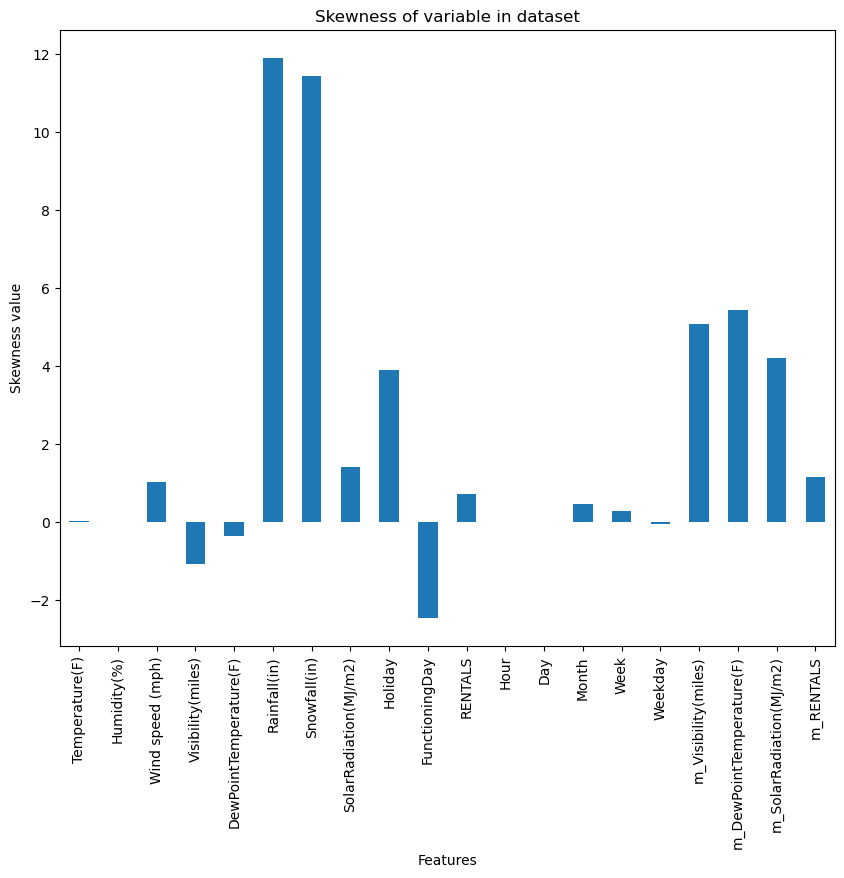

In [42]:
# Looking at the skewness of ONLY numerical features in the Dataframe df_full.

# Selecting only numeric columns from df_full to calculate skewness values.
skew_values = df_full.select_dtypes(include ='number').skew()

# Visualizing the skewness of each feature using a bar plot. 

# Setting the figure size for better visualization.
plt.figure(figsize = (10,8))

# Creating a bar plot of the skewness values.
skew_values.plot(kind = 'bar')

# Adding axis labels and title
plt.title (label = 'Skewness of variable in dataset')
plt.xlabel (xlabel = 'Features')
plt.ylabel(ylabel = 'Skewness value')

# Display the plot to show the skewness of numerical features in df_full.
plt.show()

To try and help the high skewness of  'Rainfall(in),' I performed a transformation using both an inverse and a logarithmic transformation. The goal was to make the distribution more symmetric (by stabilizing the variance and normalizing the distribution) and improve the model's predictive performance. 

In [43]:
# Apply transformations to 'Rainfall(in)' to reduce skewness and improve the overall model performance.
# THEN, inverse transformation to mitigate the effects of outliers and skewness in the feature. 
df_train['inv_Rainfall'] = 1 / (df_train['Rainfall(in)'] + 1)

# Using this log transformation to normalize 'Rainfall(in)' distribution and handle the skewness.
df_train['log_Rainfall'] = np.log1p(df_train['Rainfall(in)'])

<br><h3>Base Modeling (again) </h3>

Before creating my new feature, I refined the dataset for my regression model by selecting specific variables influencing bike rentals— weather conditions and time of day—while setting aside 'RENTALS' as the target variable to forecast demand. I used this as a first 'draft' and will add other new features for my final model. 

In [44]:
# Defining the independent variables (x_data) by excluding 'RENTALS', 'set', and 'Date' from df_full.
x_data = list(df_full.drop(labels = ['RENTALS', 
                                     'set', 
                                     'Date'], 
                          axis = 1))

# Creating a base model with a subset of features that I think influence our y-variable ('RENTALS').
base_model = ['FunctioningDay', 
              'Hour', 
              'Temperature(F)', 
              'Humidity', 
              'Rainfall(in)']

# Setting the response/dependent variable for the model.
y_variable = 'RENTALS' # should be a str

<br><h3>Feature Engineering</h3>

Feature engineering is the process of creating new features from existing ones to improve a model's predictive power. 
In this analysis, I crafted multiple new features to better capture the combined effect of different conditions that might influence bike rentals beyond what the initial individual features could show and thus predict.

(1) The "Hour_Functioning_Temperature_Humidity" feature combines the time of day, service availability, temperature, and humidity to try and see their collective impact on bike rentals. 
Since it showed a positive correlation of 0.47619 with bike rentals, it means that when the service is open, during certain hours with good weather and comfortable humidity, people are more likely to rent bikes. In other words, this feature helps predict that more favorable conditions align with increased bike rental activity.

In [45]:
# (1) 
# Creating a new feature 'Hour_Temperature_Humidity' by multiplying 'Hour', 'FunctioningDay', 'Temperature(F)', and 'Humidity(%)'.
# The goal of this new feature is to grasp the interactions between time of day, operational status, temperature, and humidity.

df_full['Hour_Functioning_Temperature_Humidity'] = df_full ["Hour"]*\
    df_full['FunctioningDay']*\
    df_full['Temperature(F)']*\
    df_full['Humidity(%)']

# Calculating and printing the correlation between the new feature and RENTALS. 
print(df_full[['RENTALS']].corrwith(df_full['Hour_Functioning_Temperature_Humidity']))

RENTALS    0.47619
dtype: float64


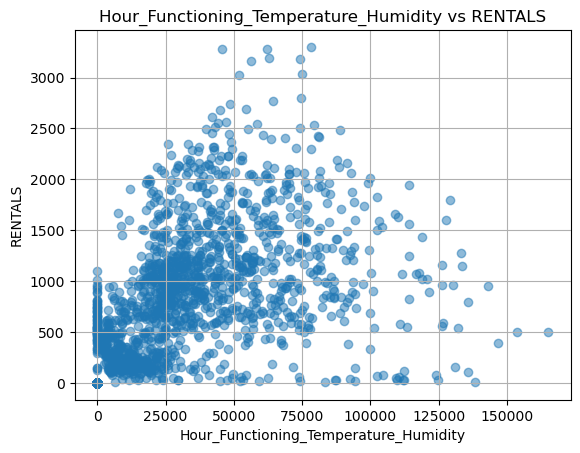

In [46]:
### Visualizing Hour_Functioning_Temperature_Humidity in a Scatter plot ###

# Analyzing the distribution of 'DewPointTemperature(F)' using a histogram to decide on which imputation strategy to use.
plt.scatter(x = df_full['Hour_Functioning_Temperature_Humidity'], 
            y = df_full['RENTALS'], 
            alpha=0.5)

# Adding title and axis labels to the graph. 
plt.title(label ='Hour_Functioning_Temperature_Humidity vs RENTALS')
plt.xlabel(xlabel ='Hour_Functioning_Temperature_Humidity')
plt.ylabel( ylabel ='RENTALS')

# Adding a grid to the scatterplot. 
plt.grid(True)

# Displaying the histogram.
plt.show()

I then created quite a few new feature based on the weather conditions by combining some weather related features:


(2) first, I create the "fav_condition" feature to highlight an ideal biking conditions by combining wind speed and visibility. I set wind of less than 5 mph as low wind and a visbility of over 10 miles as high visibility, both which - in my opinion - are favorable condition for cycling. This new feature will give me a simple yes (1) or no (0) indicator for each record in the dataset, helping me quickly identify when the weather conditions are  favorable for people to rent bikes.

In [47]:
# (2) 
# Creating a new feature 'fav_conditions' to identify good biking conditions based on wind speed and visibility.

# Defining the limits
low_wind = 5 # wind speed considered low and thus favorable for biking.
high_vis = 10 # visibility considered high and thus favorable for biking.

# Generating the new to see if any record meets the defined good biking conditions.
df_full['fav_condition'] = ((df_full['Wind speed (mph)'] < low_wind) & 
                    (df_full['Visibility(miles)'] > high_vis)).astype(int)

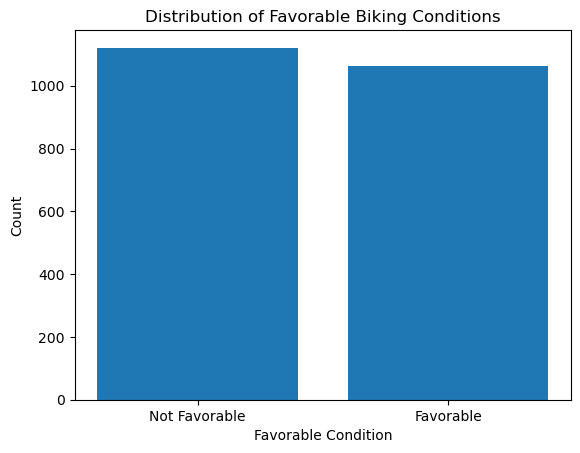

In [48]:
### Visualizing fav_condition distribution in a barplot ###

# (1) Count the occurrences of each value in 'fav_condition'
condi_counts = df_full['fav_condition'].value_counts()

# Creating a bar plot
plt.bar(condi_counts.index, 
        condi_counts.values)

# Adding labels and title
plt.title(label ='Distribution of Favorable Biking Conditions')
plt.xlabel( xlabel ='Favorable Condition')
plt.ylabel(ylabel = 'Count')

# Adding x-axis tick labels to facilitate the understanding of the graph. 
plt.xticks(condi_counts.index, ['Not Favorable', 'Favorable'])

# Displaying the plot
plt.show()

(3) Then, I created another feature to categorize weather conditions into clear, rainy, and snowy. Clear weather is defined by high visibility and an absence of rain or snow, representing ideal biking conditions. 
On the other hand, rainy and snowy weather conditions are identified by low visibility with respective precipitation, conditions that are generally less favorable for bike rentals. 
This feature aims to see the impact of different weather scenarios on bike rental. 

I then created a barplot to see the distribution to this new feature, which showed that the weather condition was mostly clear during that period, which hence explain the low level of snow and rain. 

In [49]:
# (3) 
# Categorizing weather conditions into clear, rainy, and snowy based on visibility, rainfall, and snowfall.

# Clear weather based on high visibility and no rainfall or snowfall.
df_full['clear'] = ((df_full['Visibility(miles)'] >= 5) &
                            (df_full['Rainfall(in)'] == 0) & 
                            (df_full['Snowfall(in)'] == 0)).astype(int)

# Rainy weather based on low visibility and rainfall.
df_full['rainy'] = ((df_full['Visibility(miles)'] < 5) & 
                            (df_full['Rainfall(in)'] > 0)).astype(int)

# Snowy weather based on low visibility and snowfall.
df_full['snowy'] = ((df_full['Visibility(miles)'] < 5) & 
                            (df_full['Snowfall(in)'] > 0)).astype(int)


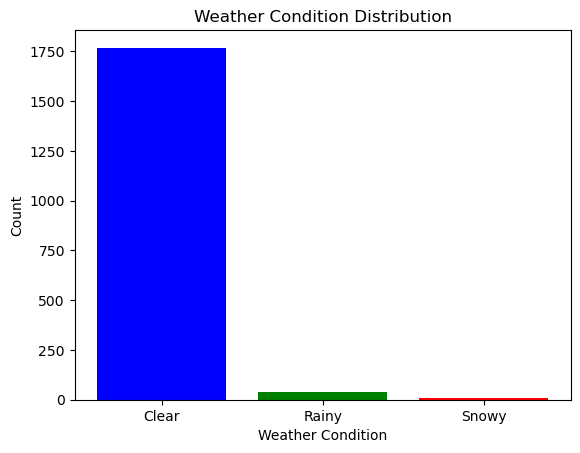

In [50]:
### Visualizing weather condition clear, rainy, snowy distribution in a barplot ###

# Counting the occurrences of each weather condition
weather_counts = df_full[['clear', 
                          'rainy', 
                          'snowy']].sum()

# Creating a stacked bar plot
plt.bar(weather_counts.index, 
        weather_counts.values, 
        color=['blue', 'green', 'red'])

# Adding labels and title
plt.title(label ='Weather Condition Distribution')
plt.xlabel(xlabel ='Weather Condition')
plt.ylabel(ylabel ='Count')

# Adding x-axis tick labels to facilitate the understanding of the graph. 
plt.xticks(weather_counts.index, ['Clear', 'Rainy', 'Snowy'])

# Displaying the plot
plt.show()

(4) Finally, I created a perfect weather' feature that combined temperature and humidity levels. 
I then converted this feature into an integer format to make it easier to use in predictive modeling. The goal is, as before, to try and see if these optimal weather conditions lead to an uptick in bike rentals.

In [53]:
# (4)
# Creating a new feature for 'perfect weather' conditions
# Whcih identifies perfect weather based on temperature and humidity ranges.

# Create a new column for perfect weather using .loc. 
df_full.loc[:, 'yay_weather'] = ((df_full['Temperature(F)'] >= 70) & 
                                      (df_full['Temperature(F)'] <= 75) & 
                                      (df_full['Humidity(%)'] >= 30) & 
                                      (df_full['Humidity(%)'] <= 35))

# Converting the boolean values into integers. 
df_full.loc[:, 'yay_weather'] = df_full['yay_weather'].astype(int)

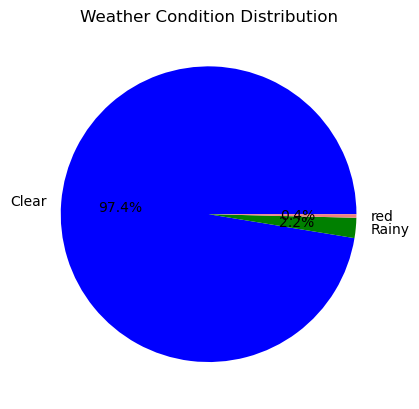

In [55]:
### Visualizing weather condition clear, rainy, snowy in a pie plot ###

# Counting the occurrences of each weather condition
weather_counts = df_full[['clear',
                          'rainy', 
                          'snowy']].sum()

# Creating a pie chart
plt.pie(weather_counts, 
        labels=['Clear', 'Rainy', 'red'], 
        autopct='%1.1f%%', 
        colors=['blue', 'green', 'lightcoral'])

# Adding title
plt.title(label = 'Weather Condition Distribution')

# Displaying the plot
plt.show()

(5) I created another feature where I marked months with high solar radiation to see how strong sunlight affects bike rentals. I set the high mark at 35 MJ/m2 for solar exposure and marked any time the radiation goes above this as 'high solar radiation'. I also calculated how much solar radiation there is compared to this high mark to understand the solar radiation levels better. The goal was to help us figure out eiether higher solar radiation (and thus sunshine) leads to more or fewer bik

In [56]:
# (5)
# Now, I want to identify the months with high solar radition. 

# That means, flagging periods with high solar radiation and determining radiation levels relative to this maximum (max_val).
max_val = 35  # Typical values for this exposure range from 1 to 35 MJ/m2.

# Identifying instances where solar radiation exceeds a predefined maximum value.
df_full.loc[:, 'high_solar_radiation'] = (df_full['SolarRadiation(MJ/m2)'] > max_val).astype(int)

# Calculating the level of solar radiation as a proportion of the maximum value.
df_full.loc[:, 'solar_radiation_level'] = df_full['SolarRadiation(MJ/m2)'] / max_val

(6)  I created features to split the day into morning, afternoon, and evening to directly see how bike rentals vary with different times of the day. This feature, if the model is accurate and works well at predicting bike rental, could help identify peak rental hours and thus help my client adjust their services  hours accordingly.

In [57]:
# (6) 
# Creating binary features for morning, afternoon, and evening

# Binary feature for 'morning; based on Hour.
df_full.loc[:,'morning'] = ((df_full['Hour'] >= 5) &
                             (df_full['Hour'] < 12)).astype(int)

# Binary feature for 'afternoon' based on Hour.
df_full.loc[:,'afternoon'] = ((df_full['Hour'] >= 12) 
                               & (df_full['Hour'] < 18)).astype(int)

# Binary feature for 'evening' based on Hour.
df_full.loc[:,'evening'] = ((df_full['Hour'] >= 18) | (df_full['Hour'] < 5)).astype(int)

(7) Lastly, I created a 'Rain_Snow' binary indicator to capture if there was any form of precipitation on a day, which addressed the skewed distribution of rainfall and snowfall data. 

In [58]:
# (7)
# Creating a a Rain/Snow binary indicator for any precipitation
# Since a lot the observations in these columns were 0. 
df_full['Rain_Snow'] = df_full['Rainfall(in)'] + df_full['Snowfall(in)'] != 0

# Converting the 'Rain_Snow' boolean values to integers (1 for True, 0 for False). 
df_full['Rain_Snow'] = df_full['Rain_Snow'].astype(int)

<br><h3>Standardization</h3>

Standardization is an important preprocessing step in data analysis, especially for regression models. 
By doing this, I will be able to scale features to have a mean of 0 and a standard deviation of 1, making my features more comparable and reducing the outlier influence on the data. The standardization will improve the performance of my model by ensuring equal influence from variables, which will ultimately lead to more accurate predictions.

In [59]:
# Preparing the explanatory variable data by excludinf RENTALS, set and Date from the dataset. 
df_full_new = df_full.drop(['RENTALS', 
                            'set', 
                            'Date'], 
                          axis = 1)

# Preparing targer variable by selecteing the RENTALS column. 
df_full_target = df_full.loc[:, 'RENTALS']

# Instantiating a StandardScaler object from standardization. 
scaler = StandardScaler()

# Fitting the scaler to the explanatory variable. 
scaler.fit(df_full_new)

# Transforming the explanatory variable using gthe fitted scale. 
x_scaled = scaler.transform(df_full_new)

# Converting the scaled data into a Dataframe. 
x_scaled_df = pd.DataFrame(x_scaled)

# Checking the results. 
x_scaled_df.describe(include = 'number').round(decimals = 1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30
count,2184.0,2184.0,2184.0,2184.0,2184.0,2184.0,2184.0,2184.0,2184.0,2184.0,2184.0,2184.0,2184.0,2184.0,2184.0,2184.0,2184.0,2184.0,2184.0,2184.0,2184.0,2184.0,2184.0,2184.0,2184.0,2184.0,2184.0,2184.0,2184.0,2184.0,2184.0
mean,0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
min,-2.4,-2.5,-1.6,-2.8,-3.2,-0.1,-0.1,-0.7,-0.2,-2.8,-1.7,-1.7,-1.1,-1.5,-1.5,-0.2,-0.2,-0.2,-0.6,-1.1,-1.0,-2.1,-0.1,-0.1,-0.1,0.0,-0.7,-0.6,-0.6,-0.9,-0.2
25%,-0.7,-0.8,-0.7,-0.6,-0.6,-0.1,-0.1,-0.7,-0.2,0.4,-0.8,-0.9,-1.1,-0.9,-1.0,-0.2,-0.2,-0.2,-0.6,-0.8,-1.0,0.5,-0.1,-0.1,-0.1,0.0,-0.7,-0.6,-0.6,-0.9,-0.2
50%,-0.0,-0.0,-0.2,0.6,-0.0,-0.1,-0.1,-0.7,-0.2,0.4,-0.0,0.0,-0.2,-0.1,-0.0,-0.2,-0.2,-0.2,-0.6,-0.2,-1.0,0.5,-0.1,-0.1,-0.1,0.0,-0.7,-0.6,-0.6,-0.9,-0.2
75%,0.8,0.8,0.6,0.8,0.7,-0.1,-0.1,0.5,-0.2,0.4,0.8,0.8,0.7,1.1,1.0,-0.2,-0.2,-0.2,0.0,0.5,1.0,0.5,-0.1,-0.1,-0.1,0.0,0.5,1.6,0.0,1.1,-0.2
max,2.6,2.0,4.6,0.8,2.4,18.9,16.1,3.3,4.1,0.4,1.7,1.8,1.5,1.7,1.5,5.3,5.6,4.4,1.7,4.6,1.0,0.5,7.3,17.6,10.1,0.0,3.3,1.6,1.7,1.1,4.1


In [60]:
# Adding labels to the new scaled Dataframe. 

x_scaled_df.columns = df_full_new.columns

# Checking BEFORE and AFTER scaling the data.
print(f"""
Original Dataframe
------------------------
{np.var(df_full_new)}

Scaled Datafreame
------------------------
{np.var(x_scaled_df)}
""")


Original Dataframe
------------------------
Temperature(F)                           1.653468e+02
Humidity(%)                              3.490233e+02
Wind speed (mph)                         4.287674e+00
Visibility(miles)                        1.190850e+01
DewPointTemperature(F)                   1.898347e+02
Rainfall(in)                             1.394668e-03
Snowfall(in)                             3.439265e-04
SolarRadiation(MJ/m2)                    6.386498e-01
Holiday                                  5.192610e-02
FunctioningDay                           1.003047e-01
Hour                                     4.790659e+01
Day                                      7.677835e+01
Month                                    1.326610e+00
Week                                     2.544352e+01
Weekday                                  3.999955e+00
m_Visibility(miles)                      3.358760e-02
m_DewPointTemperature(F)                 2.973654e-02
m_SolarRadiation(MJ/m2)              

<br><hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h2>Part III: Data Partitioning</h2><br>

Now that I have handled missing values, understood my dataset, and created a base model and new features,  I will start the data partitioning. Data partitioning is a crucial step as it allows for the separation of data into training and testing sets, ensuring that the model is trained on one set and evaluated on another, which, therefore, provides an accurate assessment of its performance and prevents overfitting of the data (which can be detrimental for model prediction).
<br>
<br><h3>Separating the Kaggle Data</h3><br>

In [61]:
## parsing out testing data (needed for later) ##

# dataset for kaggle
kaggle_data = df_full[ df_full['set'] == 'Kaggle' ].copy()


# dataset for model building
df = df_full[ df_full['set'] == 'Not Kaggle' ].copy()


# dropping set identifier (kaggle)
kaggle_data.drop(labels = 'set',
                 axis = 1,
                 inplace = True)


# dropping set identifier (model building)
df.drop(labels = 'set',
        axis = 1,
        inplace = True)

<br><h3>Train-Test Split</h3><br>

This part, and code snippet, selects specific features (my x-variables) from the dataset to be used for modeling. Then, it performs data preprocessing steps, such as removing non-numeric columns and missing values, and splits the data into training and testing sets. 

In [63]:
#!###########################!#
#!# choose your x-variables #!#
#!###########################!#
x_features = [
            # 'Visibility(miles)',
            # 'DewPointTemperature(F)',
              'FunctioningDay',
              'Humidity(%)',
              'Wind speed (mph)',
              'Holiday',
              'Rain_Snow',
              'Temperature(F)',
              # 'Rainfall(in)',
              "SolarRadiation(MJ/m2)",
              "Hour",
              "Hour_Functioning_Temperature_Humidity"] # this should be a list


## ########################### ##
## DON'T CHANGE THE CODE BELOW ##
## ########################### ##

# removing non-numeric columns and missing values
x_data = df[x_features].copy().select_dtypes(include=[int, float]).dropna(axis = 0)
# ^ BC: 
# CAREFULLY dateHour is NOT time, its as a STRING
# ID: cant let in or itll BREAK your model
# everythign thats not numeric - GOES AWAY (yes/no , etc bc will BREAK our model)
# thats what this does

y_data = df[y_variable]


# train-test split (to validate the model)
x_train, x_test, y_train, y_test = train_test_split(x_data, 
                                                    y_data, 
                                                    test_size    = 0.25,
                                                    random_state = 702 )


x_data_scaled = scaler.fit_transform(x_data)
x_train_scaled, x_test_scaled, y_train_scaled, y_test_scaled = train_test_split(x_data_scaled, 
                                                    y_data, 
                                                    test_size    = 0.25,
                                                    random_state = 702 )


# results of train-test split
print(f"""
Original Dataset Dimensions
---------------------------
Observations (Rows): {df.shape[0]}
Features  (Columns): {df.shape[1]}


Training Data (X-side)
----------------------
Observations (Rows): {x_train.shape[0]}
Features  (Columns): {x_train.shape[1]}


Training Data (y-side)
----------------------
Feature Name:        {y_train.name}
Observations (Rows): {y_train.shape[0]}


Testing Data (X-side)
---------------------
Observations (Rows): {x_test.shape[0]}
Features  (Columns): {x_test.shape[1]}


Testing Data (y-side)
---------------------
Feature Name:        {y_test.name}
Observations (Rows): {y_test.shape[0]}""")


Original Dataset Dimensions
---------------------------
Observations (Rows): 1638
Features  (Columns): 33


Training Data (X-side)
----------------------
Observations (Rows): 1228
Features  (Columns): 9


Training Data (y-side)
----------------------
Feature Name:        RENTALS
Observations (Rows): 1228


Testing Data (X-side)
---------------------
Observations (Rows): 410
Features  (Columns): 9


Testing Data (y-side)
---------------------
Feature Name:        RENTALS
Observations (Rows): 410


<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h2>Part III: Candidate Modeling and Results </h2><br>

In this regression modeling case study we were given 6 permitted model type to create our predictive model, I tried all of them then selected the three that worked best for me, that is : 
1. Lasso Regression
2. Decision Tree Regressor
3. KNN

In [64]:
# Creating and defining a function to print a summary of model performance metrics.
def print_model_summary(model_name, model_train_score, model_test_score, model_gap):
    model_summary =  f"""\
Model Name:     {model_name}
Train_Score:    {model_train_score}
Test_Score:     {model_test_score}
Train-Test Gap: {model_gap}
"""
    print(model_summary)

In [ ]:
######################################## Model Results ######################################## 

##### ONLY FOR LASSO MODEL ######

# zipping each feature name to its coefficient
# model_coefficients = zip(x_train.columns,
                        # model.coef_.round(decimals = 4))


# setting up a placeholder list to store model features
#coefficient_lst = [('intercept', model.intercept_.round(decimals = 4))]


# printing out each feature-coefficient pair one by one
#for coefficient in model_coefficients:
    #coefficient_lst.append(coefficient)
    

# checking the results
#for pair in coefficient_lst:
    #print(pair)

In [65]:
######################################## (2) Candidate Modeling ######################################## 
######################################## Decision Tree Regressor ######################################## 


#!###########################!#
#!# choose your x-variables #!#
#!###########################!#

# Naming the model: 
model_name = 'Decision Regressor Tree'

# Model type
# Including the HYPERparameter
model = sklearn.tree.DecisionTreeRegressor(random_state=702,
                                           splitter='random',
                                           min_samples_leaf=5,
                                           max_depth=9,
                                           criterion='friedman_mse') 

# FITTING to the training data
model_fit = model.fit(x_train_scaled, y_train_scaled)

# PREDICTING on new data
model_pred = model.predict(x_test_scaled)

# SCORING the results
model_train_score = model.score(x_train_scaled, y_train_scaled).round(4)  # R-square of Train data
model_test_score = model.score(x_test_scaled, y_test_scaled).round(4)  # R-square of Test data
model_gap = abs(model_train_score - model_test_score).round(4)

# Dynamically printing results:
print_model_summary(model_name, model_train_score, model_test_score, model_gap)


Model Name:     Decision Regressor Tree
Train_Score:    0.7971
Test_Score:     0.7439
Train-Test Gap: 0.0532



In [66]:
######################################## (1) Candidate Modeling ######################################## 
######################################## Lasso Regression ######################################## 


#!###########################!#
#!# choose your x-variables #!#
#!###########################!#

# (2) Lasso Regression with non-zero alpha
# Applying Lasso Regression with non-zero alpha for regularization and printing the model summary.

# Naming the model.
model_name = 'Lasso (unscaled)'

# Model type
model = sklearn.linear_model.Lasso(alpha=0.1)  # Set alpha to a non-zero value

# FITTING to the training data
model_fit = model.fit(x_train, y_train)

# PREDICTING on new data
model_pred = model.predict(x_test)

# SCORING the results
model_train_score = model.score(x_train, y_train).round(4)
model_test_score  = model.score(x_test, y_test).round(4)
model_gap         = abs(model_train_score - model_test_score).round(4)

# Dynamically printing results:
print_model_summary(model_name, model_train_score, model_test_score, model_gap)


Model Name:     Lasso (unscaled)
Train_Score:    0.5734
Test_Score:     0.5487
Train-Test Gap: 0.0247



<br>
<h3>Hyperparameter Tuning</h3><br>


In [67]:
## Hyperparameter Tuning ##

# ONLY FOR DECISION TREE REGRESSOR #

# declaring a hyperparameter space
criterion_range = ["mse", "friedman_mse", "mae", "poisson"]
splitter_range  = ['best', 'random']
depth_range     = np.arange(1, 11, 1)
leaf_range      = np.arange(1, 1001, 1)


# creating a hyperparameter grid
param_grid = {'criterion'        : criterion_range,
              'splitter'         : splitter_range,
              'max_depth'        : depth_range,
              'min_samples_leaf' : leaf_range}


# INSTANTIATING the model object without hyperparameters
tuned_tree = sklearn.tree.DecisionTreeRegressor(random_state = 219)


# RandomizedSearchCV object
tuned_tree_cv = RandomizedSearchCV(estimator             = tuned_tree,
                                   param_distributions   = param_grid,
                                   cv                    = 5,
                                   n_iter                = 1000,
                                   random_state          = 702)


# FITTING to the FULL DATASET (due to cross-validation)
tuned_tree_cv.fit(x_data, y_data)


# printing the optimal parameters and best score
print("Tuned Parameters  :", tuned_tree_cv.best_params_)
print("Tuned Training AUC:", tuned_tree_cv.best_score_.round(4))

Tuned Parameters  : {'splitter': 'random', 'min_samples_leaf': 7, 'max_depth': 9, 'criterion': 'friedman_mse'}
Tuned Training AUC: 0.7492


/Users/estervandeput/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
2495 fits failed out of a total of 5000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1245 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/estervandeput/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/estervandeput/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1144, in wrapper
    estimator._validate_params()
  File "/Users/estervandeput/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 637, in _validate_params
    validate_

<br>
<h3> Final Model Results</h3><br>

The best-performing model, and therefore the one that I chose as a final predictive model, is KNN. It has the highest scores during training and testing compared to other models, showing that it can predict bike rentals more accurately with unseen data. This model considers multiple factors such as solar radiation, time of day, temperature, humidity, operating days, wind speed, holidays, and precipitation (rain/snow). Additionally, I included two new features that I created, "Hour_Functioning_Temperature_Humidity" and "Rain_Snow," to capture more nuances in bike rental demand.

In [68]:
### FINAL 'CHOSEN ' MODEL ###

x_train[x_features] = scaler.fit_transform(x_train)
x_test[x_features] = scaler.transform(x_test)

# KNN Regression
model_name = 'KNN'
model = sklearn.neighbors.KNeighborsRegressor(n_neighbors=6)

## ########################### ##
## DON'T CHANGE THE CODE BELOW ##
## ########################### ##

# FITTING to the training data
model_fit = model.fit(x_train, y_train)


# PREDICTING on new data
model_pred = model.predict(x_test)


# SCORING the results
model_train_score = model.score(x_train, y_train).round(4)
model_test_score  = model.score(x_test, y_test).round(4)
model_gap         = abs(model_train_score - model_test_score).round(4)
    

# dynamically printing results
model_summary =  f"""\
Model Name:     {model_name}
Train_Score:    {model_train_score}
Test_Score:     {model_test_score}
Train-Test Gap: {model_gap}
"""

print(model_summary)

Model Name:     KNN
Train_Score:    0.8167
Test_Score:     0.7696
Train-Test Gap: 0.0471



<br>

<h3>Residual Analysis</h3><br>
After creating a model, it is important to examine the the residual differences between the actual and predicted bike rental counts from the KNN model as it gives insights about the model performance. 

In [69]:
## Residual Analysis ##

# organizing residuals
model_residuals = {"True"            : y_test,
                   "Predicted"       : model_pred
                  }


# converting residuals into df
model_resid_df = pd.DataFrame(data = model_residuals)


# checking results
model_resid_df.head(n = 5)


#!###########################!#
#!# add more code as needed #!#
#!###########################!#



,True,Predicted
ID,,
mb_1509,908.0,859.500000
mb_559,131.0,68.000000
mb_040,1208.0,1457.833333
mb_1346,291.0,442.833333
mb_1463,1433.0,1270.500000


While the KNN model achieved high training and testing scores (0.8167 and 0.7696) with a narrow train-test gap of 0.0471, I need to look further at how well it performs with real data. 

Looking at the residuals, the model sometimes underestimates or overestimates rental counts. For example, for observation mb_040, where the true count was 1208, the model predicted 1457.833333, which results in an overestimation of 249.833333 rentals. These variations in the prediction accuracy highlight areas where the model could be improved to better capture the complexities of bike rental demand.

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h2>Part IV: Preparing Submission File for Kaggle</h2><br>
The code below will store the predicted values for each of the models above.

In [70]:
# removing non-numeric columns and missing values
x_kaggle_df = kaggle_data[x_features].copy()


# x-data
x_data_kaggle = x_kaggle_df

# y-data
y_data_kaggle = kaggle_data[y_variable]

# scale data too
x_data_kaggle[x_features] = scaler.transform(x_data_kaggle)

# Fitting model from above to the Kaggle test data
kaggle_predictions = model.predict(x_data_kaggle)

In [52]:
# kaggle just NEEDS your predictions 
# then we will create a kaggle/csv file (see down)
# CAREFUL always RENAME or the odl file will be overwritten/gone
#this will go into an output file  (model output) which will map ID and rentals)

<br>
<h3>Creating the Kaggle File</h3><br>

In [71]:
## Kaggle Submission File ##

# organizing predictions
model_predictions = {"RENTALS" : kaggle_predictions}


# converting predictions into df
model_pred_df = pd.DataFrame(data  = model_predictions,
                             index = df_test.index)


#!######################!#
#!# name the .csv file #!#
#!######################!#

# sending predictions to .csv
model_pred_df.to_csv(path_or_buf = "./model_output/wooohoooo.csv",
                     index       = True,
                     index_label = 'ID')

<br>

CONCLUSION


In conclusion, this analysis/case study model has provided valuable insights into predicting bike rentals in the Chicago metropolitan area. 
The KNN model, with its training score of 0.8167 and testing score of 0.7696, shows a reasonable accuracy in predicting unseen data (so data that has not been seen before, which would help our client predict the bike rental). There is, of course, room for improvement, as indicated by the small but existent train-test gap of 0.0471. 
Including features such as "Hour_Functioning_Temperature_Humidity" and "Rain_Snow" enhanced my model's ability to capture the complexities of bike rental demand, which aligned well with the objectives outlined by my client. 
Now, while my KNN predictive model offers promising results, I acknowledge its limitations and that there is room for improvement. 

As mentioned, the residual analysis highlights instances where the model could overestimate or underestimate rental counts, which is an issue when trying to predict unseen data accurately. i

Despite these challenges, the model provides valuable insights for planning and resource allocation within the bike-sharing system. By leveraging the KNN model, the Cook County Planning and Development Department can make more informed decisions regarding bike rental operations, ultimately contributing to improving transportation sustainability and accessibility in the Chicago metropolitan area.



<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

~~~

  _    _                           __  __           _      _ _             _ 
 | |  | |                         |  \/  |         | |    | (_)           | |
 | |__| | __ _ _ __  _ __  _   _  | \  / | ___   __| | ___| |_ _ __   __ _| |
 |  __  |/ _` | '_ \| '_ \| | | | | |\/| |/ _ \ / _` |/ _ \ | | '_ \ / _` | |
 | |  | | (_| | |_) | |_) | |_| | | |  | | (_) | (_| |  __/ | | | | | (_| |_|
 |_|  |_|\__,_| .__/| .__/ \__, | |_|  |_|\___/ \__,_|\___|_|_|_| |_|\__, (_)
              | |   | |     __/ |                                     __/ |  
              |_|   |_|    |___/                                     |___/   

                                                            

~~~

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<br>